# Normal Gravity and Gravity Disturbance

## Importing libraries

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs

In [2]:
notebook_name = '3.normal_gravity.ipynb'

### Plot style

In [3]:
plt.style.use('ggplot')

## Importing my package

In [4]:
dir_modules = 'mypackage'
sys.path.append(dir_modules)

In [5]:
import my_package as pkg

#### Open a dictionary

In [6]:
data_set = dict()

#### Saving files

In [7]:
saved_files = []

### Fetching data

### Gravity Earth data

In [8]:
filename = 'data_set/gravity_earth_EIGEN-6C4_ICGEM.gdf'

In [9]:
names = ['LONG','LAT','H_geoid','GRAV_DATA']

In [10]:
data = pd.read_csv(filename,usecols=(0,1,2,3),names=names, skipinitialspace=True, skiprows=34,
                   delim_whitespace=True,low_memory=False)

#### Observation coordinates

In [11]:
N_long = 181
N_lat = 361
data_set['shape'] = (N_long,N_lat)

In [12]:
data_set['long'] = data.iloc[:,0].to_numpy()
data_set['lat'] = data.iloc[:,1].to_numpy()
data_set['LONG'] = data_set['long'].reshape(data_set['shape'])
data_set['LAT'] = data_set['lat'].reshape(data_set['shape'])

In [13]:
data_set['H_over_geoid'] = data.iloc[:,2].to_numpy()
data_set['H_geo'] = data_set['H_over_geoid'].reshape(data_set['shape'])

#### Gravity Earth data

In [14]:
data_set['grav_field'] = data.iloc[:,3].to_numpy()
data_set['grav_field'] = data_set['grav_field'].reshape(data_set['shape'])

### Calculating Normal gravity

#### Reference ellipsoid WGS84

In [15]:
a, f, GM, omega = pkg.WGS84()

#### With Somigliana 1929

In [16]:
data_set['gamma_S_h0'] = pkg.somigliana(a, f, GM, omega, data_set['LAT'])

#### With Closed-form formula proposed by Li and Gotze (2001)

In [17]:
data_set['h'] = 0.

In [18]:
data_set['gamma_LG_h0'] = pkg.closedform(a, f, GM, omega, data_set['LAT'], data_set['h'])

## Normal Gravity (Somigliana)

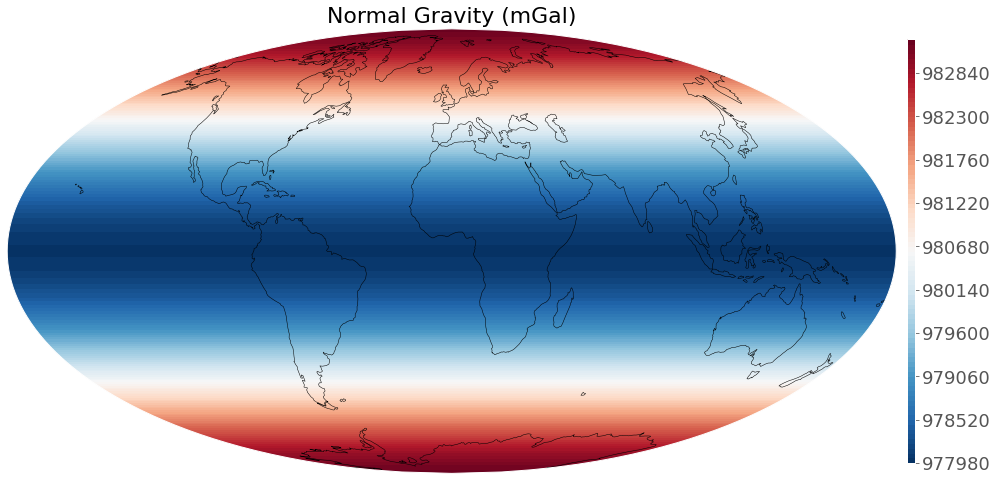

In [19]:
title_font = 22
bottom_font = 18
plt.figure(figsize=(15,15), tight_layout=True)

projection = ccrs.Mollweide()
ax = plt.axes(projection=projection)
ax.set_global()
ax.coastlines()
ax.set_title('Normal Gravity (mGal)',size=title_font)
pg = ax.contourf(data_set['LONG'],
            data_set['LAT'],
            data_set['gamma_S_h0'],100,transform=ccrs.PlateCarree(),cmap='RdBu_r')
cb = plt.colorbar(pg, orientation="vertical", pad=0.01, aspect=50, shrink=.4)
cb.ax.tick_params(labelsize=bottom_font)

file_name = 'images/normal_gravity_somigliana'
plt.savefig(file_name+'.png',dpi=300)
saved_files.append(file_name+'.png')

plt.show()

## Normal Gravity (Li and Gotze [2001])

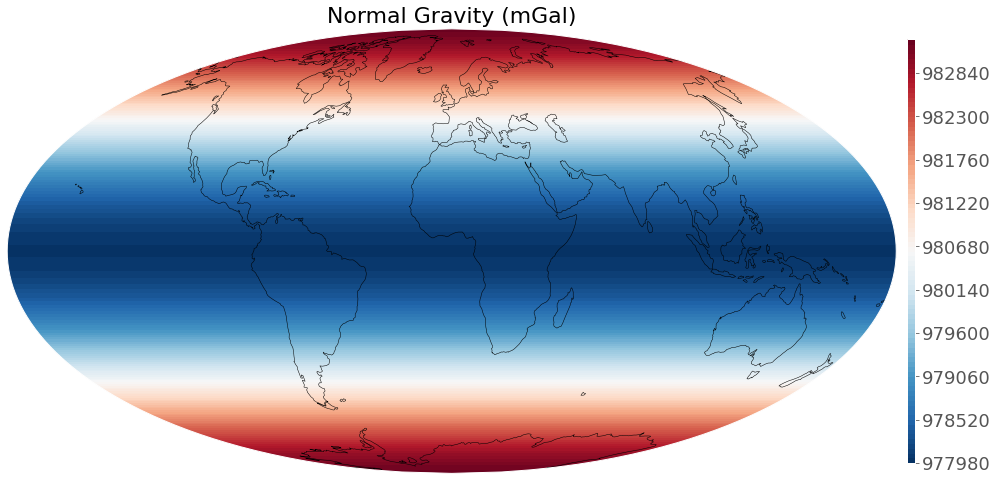

In [20]:
title_font = 22
bottom_font = 18
plt.figure(figsize=(15,15), tight_layout=True)

projection = ccrs.Mollweide()
ax = plt.axes(projection=projection)
ax.set_global()
ax.coastlines()
ax.set_title('Normal Gravity (mGal)',size=title_font)
pg = ax.contourf(data_set['LONG'],
            data_set['LAT'],
            data_set['gamma_LG_h0'],100,transform=ccrs.PlateCarree(),cmap='RdBu_r')
cb = plt.colorbar(pg, orientation="vertical", pad=0.01, aspect=50, shrink=.4)
cb.ax.tick_params(labelsize=bottom_font)

file_name = 'images/normal_gravity_Li_and_Gotze_[2001]'
plt.savefig(file_name+'.png',dpi=300)
saved_files.append(file_name+'.png')

plt.show()

### Calculating the Gravity Disturbance

#### Free air with Somigliana

In [21]:
data_set['gamma_S_P'] = data_set['gamma_S_h0'] - 0.3086*(data_set['H_geo'])

In [22]:
data_set['disturbance_S'] = data_set['grav_field'] - data_set['gamma_S_P']

#### Free air with Li and Gotze (2001)

In [23]:
data_set['gamma_LG_P'] = pkg.closedform(a, f, GM, omega, data_set['LAT'], data_set['H_geo'])

In [24]:
data_set['disturbance_LG'] = data_set['grav_field'] - data_set['gamma_LG_P']

## Visualization gravity disturbance (Somigliana)

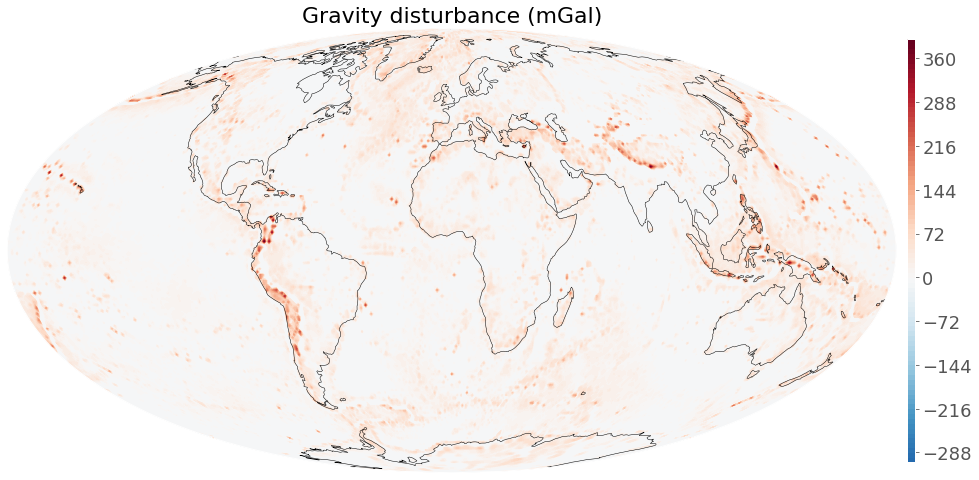

In [25]:
title_font = 22
bottom_font = 18
plt.figure(figsize=(15,15), tight_layout=True)

ranges = np.abs([data_set['disturbance_S'].min(), data_set['disturbance_S'].max()]).max()
projection = ccrs.Mollweide()
ax = plt.axes(projection=projection)
ax.set_global()
ax.coastlines()
ax.set_title('Gravity disturbance (mGal)',size=title_font)
pg = ax.contourf(data_set['LONG'],
                 data_set['LAT'],
                 data_set['disturbance_S'],100,transform=ccrs.PlateCarree(),cmap='RdBu_r',vmax=ranges,vmin=-ranges)
cb = plt.colorbar(pg, orientation="vertical", pad=0.01, aspect=50, shrink=.4)
cb.ax.tick_params(labelsize=bottom_font)

file_name = 'images/disturbance_free_air_classical_formula'
plt.savefig(file_name+'.png',dpi=300)
saved_files.append(file_name+'.png')

plt.show()

## Visualization gravity disturbance (Li and Gotze [2001])

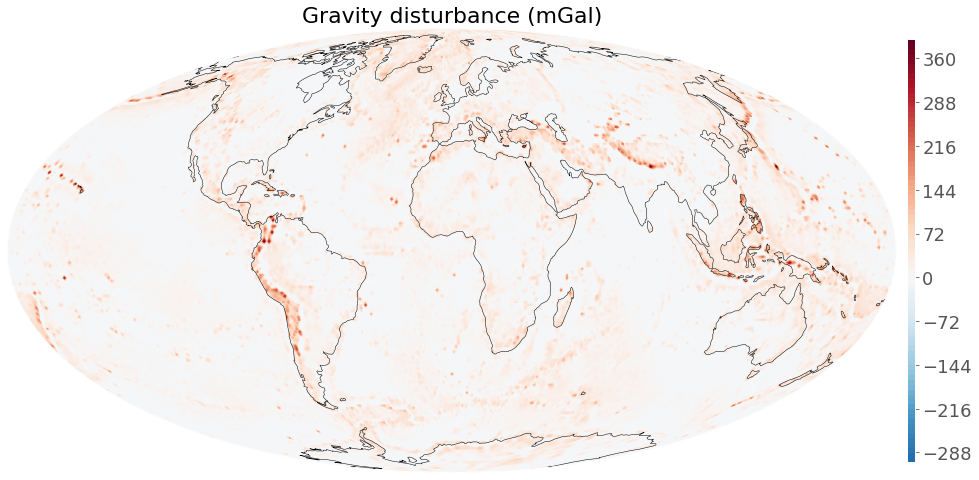

In [26]:
title_font = 22
bottom_font = 18
plt.figure(figsize=(15,15), tight_layout=True)

ranges = np.abs([data_set['disturbance_LG'].min(), data_set['disturbance_LG'].max()]).max()
projection = ccrs.Mollweide()
ax = plt.axes(projection=projection)
ax.set_global()
ax.coastlines()
ax.set_title('Gravity disturbance (mGal)',size=title_font)
pg = ax.contourf(data_set['LONG'],
                 data_set['LAT'],
                 data_set['disturbance_LG'],100,transform=ccrs.PlateCarree(),cmap='RdBu_r',vmax=ranges,vmin=-ranges)
cb = plt.colorbar(pg, orientation="vertical", pad=0.01, aspect=50, shrink=.4)
cb.ax.tick_params(labelsize=bottom_font)

file_name = 'images/disturbance_closedform_formula'
plt.savefig(file_name+'.png',dpi=300)
saved_files.append(file_name+'.png')

plt.show()